In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=02e529b5a9abff1614d1f516b3857f71


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | celestun
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | neiafu
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | kirakira
Processing Record 14 of Set 1 | novosheshminsk
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | yurkivka
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | makat
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | pit

Processing Record 37 of Set 4 | lovozero
Processing Record 38 of Set 4 | darhan
Processing Record 39 of Set 4 | esmeraldas
Processing Record 40 of Set 4 | wewak
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | bud
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | nagda
Processing Record 46 of Set 4 | verkhnechusovskiye gorodki
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | masuguru
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | rio gallegos
Processing Record

Processing Record 27 of Set 8 | beroroha
Processing Record 28 of Set 8 | lethem
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | antofagasta
Processing Record 31 of Set 8 | keningau
Processing Record 32 of Set 8 | chebenki
Processing Record 33 of Set 8 | taunggyi
Processing Record 34 of Set 8 | esperance
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | haapiti
Processing Record 37 of Set 8 | daxian
City not found. Skipping...
Processing Record 38 of Set 8 | dhamtari
Processing Record 39 of Set 8 | huaiyin
Processing Record 40 of Set 8 | teguise
Processing Record 41 of Set 8 | havre
Processing Record 42 of Set 8 | tazmalt
Processing Record 43 of Set 8 | severodvinsk
Processing Record 44 of Set 8 | mrirt
City not found. Skipping...
Processing Record 45 of Set 8 | rocky mountain house
Processing Record 46 of Set 8 | tigil
Processing Record 47 of Set 8 | belawan
Processing Record 48 of Set 8 | ordzhonikidze
Processing Record 49 of Set 8 | p

Processing Record 14 of Set 12 | chitral
Processing Record 15 of Set 12 | te anau
Processing Record 16 of Set 12 | sidi ali
Processing Record 17 of Set 12 | darnah
Processing Record 18 of Set 12 | ulladulla
Processing Record 19 of Set 12 | betioky
Processing Record 20 of Set 12 | hervey bay
Processing Record 21 of Set 12 | christchurch
Processing Record 22 of Set 12 | saint-georges
Processing Record 23 of Set 12 | kuche
City not found. Skipping...
Processing Record 24 of Set 12 | ancona
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | burica
City not found. Skipping...
Processing Record 27 of Set 12 | sobolevo
Processing Record 28 of Set 12 | gelemso
Processing Record 29 of Set 12 | tsukumi
Processing Record 30 of Set 12 | bugulma
Processing Record 31 of Set 12 | doha
Processing Record 32 of Set 12 | chulym
Processing Record 33 of Set 12 | svarstad
Processing Record 34 of Set 12 | igarka
Processing Record 35 of Set 12 | chandbali
Processing Record 36 of 

In [20]:
print(city_data)

[{'City': 'Mataura', 'Lat': -46.19, 'Lng': 168.86, 'Max Temp': 48, 'Humidity': 93, 'Cloudiness': 85, 'Wind Speed': 1.99, 'Country': 'NZ', 'Date': '2020-04-17 07:08:49'}, {'City': 'Georgetown', 'Lat': 5.41, 'Lng': 100.34, 'Max Temp': 87.8, 'Humidity': 74, 'Cloudiness': 20, 'Wind Speed': 5.82, 'Country': 'MY', 'Date': '2020-04-17 07:08:49'}, {'City': 'Vila Franca Do Campo', 'Lat': 37.72, 'Lng': -25.43, 'Max Temp': 55.4, 'Humidity': 82, 'Cloudiness': 20, 'Wind Speed': 9.17, 'Country': 'PT', 'Date': '2020-04-17 07:08:50'}, {'City': 'Rikitea', 'Lat': -23.12, 'Lng': -134.97, 'Max Temp': 76.33, 'Humidity': 75, 'Cloudiness': 3, 'Wind Speed': 9.73, 'Country': 'PF', 'Date': '2020-04-17 07:08:50'}, {'City': 'Yellowknife', 'Lat': 62.46, 'Lng': -114.35, 'Max Temp': 32, 'Humidity': 92, 'Cloudiness': 100, 'Wind Speed': 4, 'Country': 'CA', 'Date': '2020-04-17 07:08:50'}, {'City': 'Padang', 'Lat': -0.95, 'Lng': 100.35, 'Max Temp': 85.87, 'Humidity': 70, 'Cloudiness': 75, 'Wind Speed': 5.23, 'Country': 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,48.00,93,85,1.99,NZ,2020-04-17 07:08:49
1,Georgetown,5.41,100.34,87.80,74,20,5.82,MY,2020-04-17 07:08:49
2,Vila Franca Do Campo,37.72,-25.43,55.40,82,20,9.17,PT,2020-04-17 07:08:50
3,Rikitea,-23.12,-134.97,76.33,75,3,9.73,PF,2020-04-17 07:08:50
4,Yellowknife,62.46,-114.35,32.00,92,100,4.00,CA,2020-04-17 07:08:50
5,Padang,-0.95,100.35,85.87,70,75,5.23,ID,2020-04-17 07:06:40
6,Sao Filipe,14.90,-24.50,70.50,78,44,16.73,CV,2020-04-17 07:08:51
7,Kaitangata,-46.28,169.85,50.00,81,99,20.00,NZ,2020-04-17 07:05:33
8,Celestun,20.87,-90.40,79.56,80,83,14.47,MX,2020-04-17 07:08:51
9,Neiafu,-18.65,-173.98,80.46,78,100,6.62,TO,2020-04-17 07:08:51


In [24]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-04-17 07:08:49,-46.19,168.86,48.00,93,85,1.99
1,Georgetown,MY,2020-04-17 07:08:49,5.41,100.34,87.80,74,20,5.82
2,Vila Franca Do Campo,PT,2020-04-17 07:08:50,37.72,-25.43,55.40,82,20,9.17
3,Rikitea,PF,2020-04-17 07:08:50,-23.12,-134.97,76.33,75,3,9.73
4,Yellowknife,CA,2020-04-17 07:08:50,62.46,-114.35,32.00,92,100,4.00
...,...,...,...,...,...,...,...,...,...
548,Semporna,MY,2020-04-17 07:11:14,4.48,118.61,78.80,100,20,3.36
549,Natal,BR,2020-04-17 07:06:45,-5.79,-35.21,79.00,85,69,11.41
550,Puerto Colombia,CO,2020-04-17 07:11:14,10.99,-74.95,78.80,88,46,12.75
551,Abatskoye,RU,2020-04-17 07:11:15,56.29,70.46,58.28,39,100,19.08


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

0     -46.19
1       5.41
2      37.72
3     -23.12
4      62.46
       ...  
548     4.48
549    -5.79
550    10.99
551    56.29
552    41.35
Name: Lat, Length: 553, dtype: float64

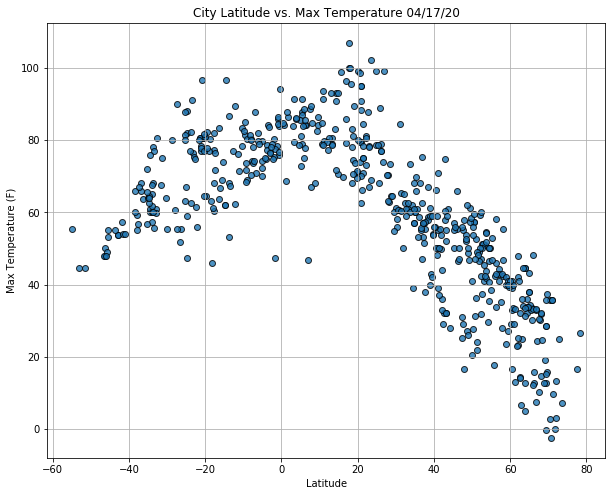

In [34]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

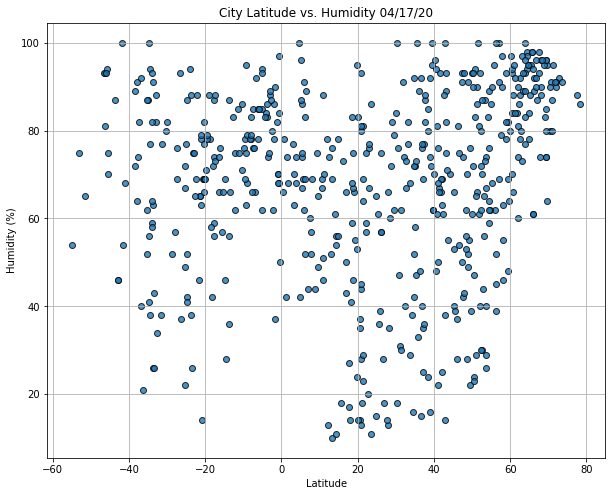

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


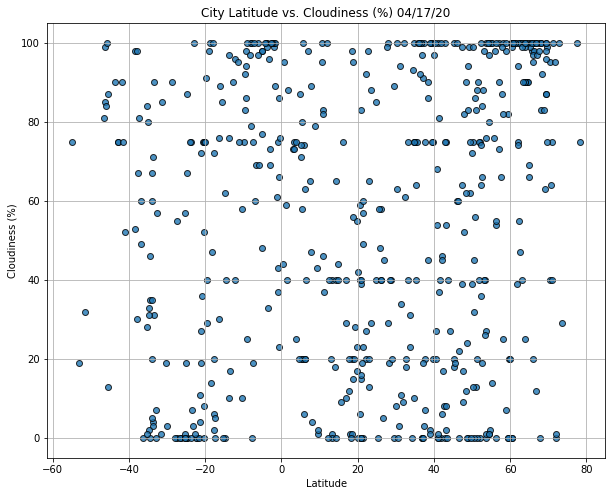

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

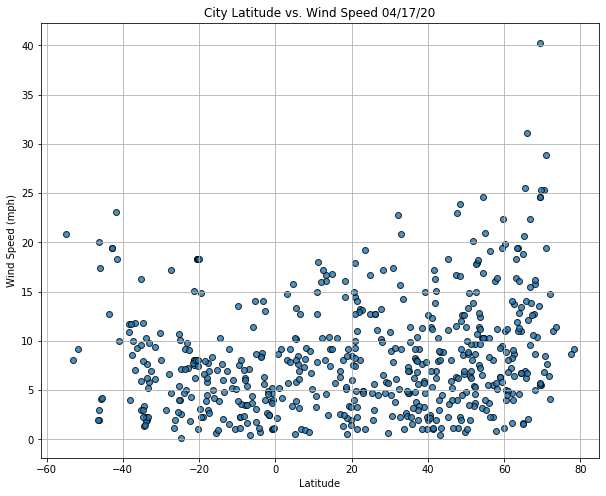

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()